# Exercises Sheet 3 Reinforcement Learning

# Ex 1

Iteration 0
                   
O                  
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 100
      O            
                   
                   
                   
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 200
                   
                   
                   
  O                
                   
                   
                   
                   
                   
                  X

--------------------
Iteration 300
                   
                   
                   
                   
                  O
                   
                   
                   
                   
                  X

--------------------
Iteration 400
                   
            O      
    

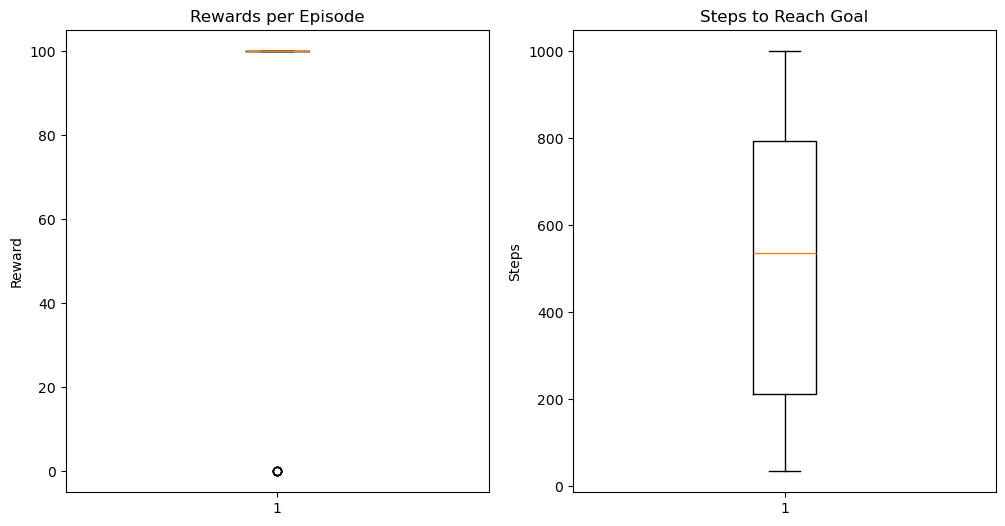

Average Reward per Episode: 83.33333333333333
Average Steps to Goal: 530.3333333333334
Standard Deviation of Steps: 326.3472928577095


In [65]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time  # Optional delay for visualizing matrix updates

class Environment:
    def __init__(self):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((10, 10), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces
        self.goal_state = [9, 9]  # Goal at bottom-right corner
        self.max_steps = 1000  # Maximum steps per episode

    def transition(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == "up" and state[0] > 0: # linhas
            state[0] -= 1 # linhas - 1
        elif action == "down" and state[0] <  self.field.shape[0] - 1: # linhas
            state[0] += 1 # linhas + 1
        elif action == "left" and state[1] > 0:
            state[1] -= 1 # colunas - 1
        elif action == "right" and state[1] < self.field.shape[1] - 1:
            state[1] += 1 # colunas + 1
        return state

    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent:
    def __init__(self, environment):
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = ["up", "down", "left", "right"]

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            action = self.choose_random_action()
            new_state = self.env.transition(self.current_state, action)
            total_reward += self.env.reward(new_state)
            steps += 1
            

            # Print the matrix every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}")
                self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal!")
                break

        self.reset()
        return total_reward, steps

# Run simulation for 30 episodes
def simulate(agent, num_episodes=30):
    rewards, steps_list = [], []

    for _ in range(num_episodes):
        reward, steps = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)

    print(f"Reward: {rewards}")
    print(f"Steps: {steps_list}")

    return rewards, steps_list


def plot_analyze(rewards, steps_list):
    """Use to analyze results."""
    # Calculate statistics
    avg_reward = np.mean(rewards)
    avg_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)

    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].boxplot(rewards, vert=True)
    ax[0].set_title("Rewards per Episode")
    ax[0].set_ylabel("Reward")

    ax[1].boxplot(steps_list, vert=True)
    ax[1].set_title("Steps to Reach Goal")
    ax[1].set_ylabel("Steps")

    plt.show()

    print(f"Average Reward per Episode: {avg_reward}")
    print(f"Average Steps to Goal: {avg_steps}")
    print(f"Standard Deviation of Steps: {std_steps}")

# Initialize environment and agent
env = Environment()
agent = Agent(env)

# Run the simulation
rewards, steps_list = simulate(agent)
plot_analyze(rewards, steps_list)

# Ex 2

                   
                   
                   
                   
                   
                   
                   
                   
                   
                   

Greed at 0.9: (not very random)
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the

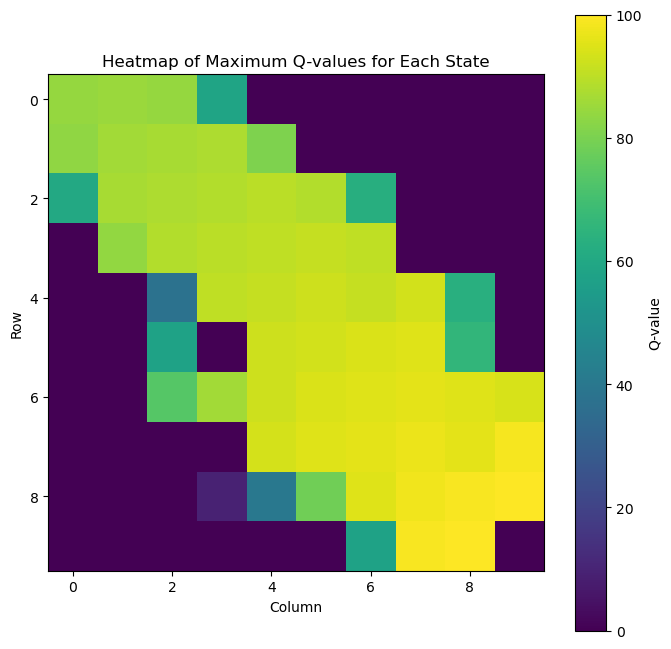

[[ 84.29431934  85.14577711  84.29431934  58.41596323   0.
    0.           0.           0.           0.           0.        ]
 [ 83.45137615  86.00583546  86.87458128  87.7521023   80.51024598
    0.           0.           0.           0.           0.        ]
 [ 60.20408482  86.87458128  87.7521023   88.63848717  89.53382543
   88.63784393  62.57098234   0.           0.           0.        ]
 [  0.          83.68366836  88.63848717  89.53382543  90.4382075
   91.35172475  90.43820748   0.           0.           0.        ]
 [  0.           0.          37.74120396  90.43399937  91.35172475
   92.27446944  91.35172475  93.16456448  62.97393025   0.        ]
 [  0.           0.          57.63253496   0.          92.27443639
   93.20653479  94.14801494  95.09900499  65.88919734   0.        ]
 [  0.           0.          73.71981359  86.30466722  92.36749538
   94.14801494  95.09900499  96.059601    95.09895445  94.06777828]
 [  0.           0.           0.           0.          93.369748

In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = 0.7
y = 0.99
greed = 0.9 # if closer to 1, then it goes to the best option
size = 10

class Environment2:
    def __init__(self, size=10):
        # Define the grid size and initialize the field matrix
        self.field = np.zeros((size, size), dtype=str)  # 10x10 grid initialized as empty
        self.field[:] = ' '  # Fill with empty spaces

        self.goal_state = [size-1, size-1]  # Goal at bottom-right corner
        self.max_steps = size * 2000  # Maximum steps per episode

        # Print the field
        self.print_field()

    def add_walls(self):
        # Add the vertical walls
        self.field[1:, size-4] = 'W'  # Wall bottom up
        self.field[:-1, 3] = 'W'  # Wall from top to bottom

    def print_field(self):
        for row in self.field:
            print(' '.join(row))
        print()
    
    '''def transfake(self, state, action):
        """State transition function based on action (up, down, left, right)."""
        # Apply the action, updating the agent's row or column position
        if action == 0 and state[0] > 0: # linhas
            return [state[0]-1,state[1]]
        elif action == 1 and state[0] < len(self.field[0]) - 1: # linhas
            return [state[0] +1,state[1]]
        elif action == 2 and state[1] > 0:
            return [state[0],state[1] -1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:
            return [state[0] ,state[1] +1]
        return state'''

    def trans_with_walls(self, state, action):
        """State transition function with walls and boundary checks."""
        # Determine the target state based on the action
        new_state = state.copy()
        reward = 0  # Default reward
        
        if action == 0 and state[0] > 0:  # Up
            new_state = [state[0] - 1, state[1]]
        elif action == 1 and state[0] < len(self.field) - 1:  # Down
            new_state = [state[0] + 1, state[1]]
        elif action == 2 and state[1] > 0:  # Left
            new_state = [state[0], state[1] - 1]
        elif action == 3 and state[1] < len(self.field[0]) - 1:  # Right
            new_state = [state[0], state[1] + 1]
        
        # Check for walls or out-of-bounds attempts
        if self.field[new_state[0], new_state[1]] == 'W' or new_state == state:
            reward = -0.1  # Penalty for invalid move
            new_state = state  # Stay in the same position

        return new_state, reward


    def reward(self, state):
        """Reward function: 100 if goal is reached, otherwise 0."""
        return 100 if state == self.goal_state else 0

    def print_matrix(self, agent_state):
        """Print the field with 'O' for the agent and 'X' for the goal."""
        # Create a copy of the field to modify for printing
        display_field = self.field.copy()
        # Mark the agent's and goal's positions
        display_field[agent_state[0], agent_state[1]] = 'O'
        display_field[self.goal_state[0], self.goal_state[1]] = 'X'
        
        # Print each row of the matrix
        for row in display_field:
            print(' '.join(row))
        print("\n" + "-" * 20)  # Divider between prints

class Agent2:
    def __init__(self, environment):
        self.q = np.zeros((environment.field.shape[1], environment.field.shape[0], 4))
        self.env = environment
        self.current_state = [0, 0]  # Starting position at top-left corner
        self.actions = [0,1,2,3]

    def reset_q(self): 
        self.q = np.zeros((self.env.field.shape[1], self.env.field.shape[0], 4))

    def choose_random_action(self):
        """Randomly select an action."""
        return random.choice(self.actions)

    def reset(self):
        """Reset the agent to the starting position."""
        self.current_state = [0, 0]

    def run_episode(self):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0

        for i in range(self.env.max_steps):
            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

    def run_episode_increasing_greed(self, current_episode, num_episodes, start_iteration=0.3, start_greed=0.3):
        """Run an episode until goal is reached or max steps are exceeded."""
        total_reward = 0
        steps = 0
        greed = 0.3

        for i in range(self.env.max_steps):
            # Set greed to 0.3 for the first 30% of steps, then increase it based on current episode
            if (current_episode / num_episodes) < start_iteration:
                greed = start_greed
            else:
                greed = start_greed + (1-start_greed) * (current_episode / num_episodes)

            print(f"current episode: {current_episode}, current greed: {greed} | ", end = '')

            q_partido = self.q[self.current_state[0], self.current_state[1]]
            # ex 2 b)
            
            # greed
            if np.random.rand() > greed:
                action = self.choose_random_action()
            else:
                # Se todas as opções forem iguais, escolhe uma aleatoriamente à mesma
                if np.all(q_partido == q_partido[0]):
                    action = self.choose_random_action()
                else:
                    #action = self.choose_random_action()
                    action = np.argmax(q_partido)

            new_state, walls_reward = self.env.trans_with_walls(self.current_state, action)
            total_reward += walls_reward
            total_reward += self.env.reward(new_state)
            steps += 1

            current_q = self.q[self.current_state[0], self.current_state[1], action]
            next_max_q = np.max(self.q[new_state[0], new_state[1], :])
            updated_q = (1 - a) * current_q + a * (self.env.reward(new_state) + y * next_max_q)
            
            self.q[self.current_state[0], self.current_state[1], action] = updated_q


            self.current_state = new_state


            # Print the matrix every 100 iterations
            #if i % 10 == 0:
            #print(f"Iteration {i}")
            #self.env.print_matrix(self.current_state)

            # Check if goal state is reached
            if self.current_state == self.env.goal_state:
                print("Reached the goal! ", end = '')
                break

        self.reset()
        return total_reward, steps, self.q

# Run simulation for 30 episodes
def simulate2(agent, num_episodes=500):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    #print(f"Reward: {rewards}")
    #print(f"Steps: {steps_list}")
    #print(f"Q: {q_lista}")

    # print(np.mean(q_lista, axis=0))

    return rewards, steps_list, q_lista

def heat_matrix(q_table):
    """
    Generate a matrix where each cell contains the maximum Q-value of all actions for that state.
    """
    # Calculate the maximum Q-value for each state by taking the max across the actions axis (axis=2)
    heatmap_matrix = np.max(q_table, axis=2)
    return heatmap_matrix

def plot_heatmap(heatmap_matrix):
    plt.figure(figsize=(8, 8))
    plt.imshow(heatmap_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label="Q-value")
    plt.title("Heatmap of Maximum Q-values for Each State")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()


ambiente = Environment2()
agente = Agent2(ambiente)

print("Greed at 0.9: (not very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()



Greed at 0.5:
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the go

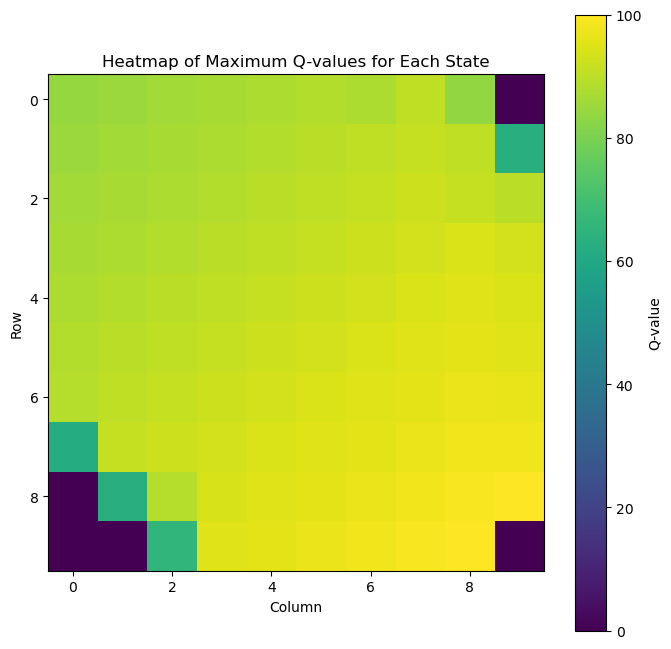

[[ 84.29431934  85.14577711  86.00037119  86.87458089  87.75210226
   88.63848717  87.75045831  90.43559294  83.94497436   0.        ]
 [ 85.14577711  86.00583546  86.87458128  87.75210187  88.6326716
   89.53382543  90.4382075   91.35172475  90.43767748  62.66959662]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   90.4382075   91.35172475  92.27446944  91.35172253  89.6038625 ]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   91.35172475  92.27446944  93.20653479  94.14801494  93.20597216]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.20653479  94.14801494  95.09900499  94.14801494]
 [ 88.63848717  89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  96.059601    95.09900499]
 [ 88.71966933  90.4382075   91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.0299      96.71694822]
 [ 61.74486057  91.24958256  92.27349328  93.20653449  94

In [67]:
greed = 0.5

print("Greed at 0.5:")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Greed at 0.1: (very random)
Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! Reached the goal! 

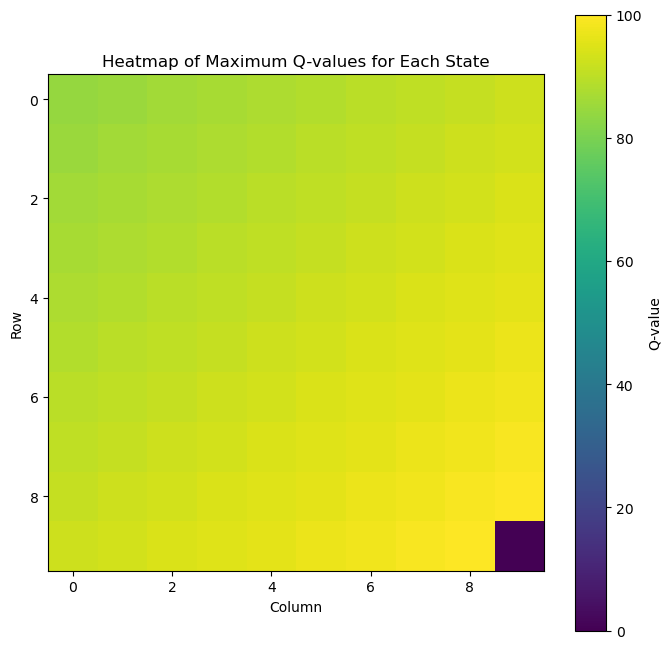

[[ 84.29431934  85.14577711  86.00583546  86.87458128  87.7521023
   88.63848717  89.53382543  90.4382075   91.35172475  92.27446944]
 [ 85.14577711  86.00583546  86.87458128  87.7521023   88.63848717
   89.53382543  90.4382075   91.35172475  92.27446944  93.20653479]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   90.4382075   91.35172475  92.27446944  93.20653479  94.14801494]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   91.35172475  92.27446944  93.20653479  94.14801494  95.09900499]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.20653479  94.14801494  95.09900499  96.059601  ]
 [ 88.63848717  89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  96.059601    97.0299    ]
 [ 89.53382543  90.4382075   91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.0299      98.01      ]
 [ 90.4382075   91.35172475  92.27446944  93.20653479  94

In [68]:
agente.reset_q()
greed = 0.1

print("Greed at 0.1: (very random)")

rewards, steps_list, lista_q = simulate2(agente)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

Increasing from 30\% of the tests
current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, current greed: 0.3 | current episode: 0, cur

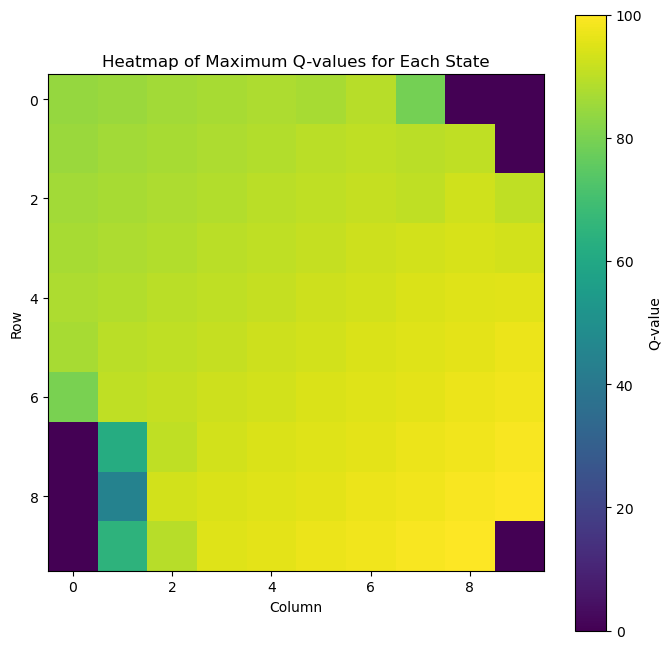

[[ 84.29431934  85.14577711  86.00583546  86.87458128  87.75210228
   86.86801663  89.18177672  79.24465024   0.           0.        ]
 [ 85.14577711  86.00583546  86.87458128  87.7521023   88.63848717
   89.53382542  90.43820272  89.4858883   90.49513349   0.        ]
 [ 86.00583546  86.87458128  87.7521023   88.63848717  89.53382543
   90.4382075   91.35172474  90.37361176  92.9322865   90.56647722]
 [ 86.87458128  87.7521023   88.63848717  89.53382543  90.4382075
   91.35172475  92.27446944  93.17528345  94.13562879  93.16655117]
 [ 87.7521023   88.63848717  89.53382543  90.4382075   91.35172475
   92.27446944  93.20653479  94.1474019   95.0922403   95.46634955]
 [ 86.8064082   89.53382543  90.4382075   91.35172475  92.27446944
   93.20653479  94.14801494  95.09900499  96.05958568  97.02554474]
 [ 80.00270361  90.40942532  91.35172475  92.27446944  93.20653479
   94.14801494  95.09900499  96.059601    97.0299      98.00999997]
 [  0.          62.07529738  90.359865    93.20653479  9

In [69]:
agente.reset_q()
greed = 0.9

# Run simulation for 30 episodes
def simulate_increasing_greed(agent, start_iteration=0.3, start_greed=0.3, num_episodes=500):
    rewards, steps_list, q_lista = [], [], []

    for current_episode in range(num_episodes):
        reward, steps, q = agent.run_episode_increasing_greed(current_episode, num_episodes, start_iteration=start_iteration, start_greed=start_greed)
        #reward, steps, q = agent.run_episode()
        rewards.append(reward)
        steps_list.append(steps)
        q_lista.append(q)

    return rewards, steps_list, q_lista  # Ensure the function returns the values

# greed = 0.1

print("Increasing from 30\% of the tests")

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.3)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()

# Ex 4

current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed: 0.91 | current episode: 0, current greed:

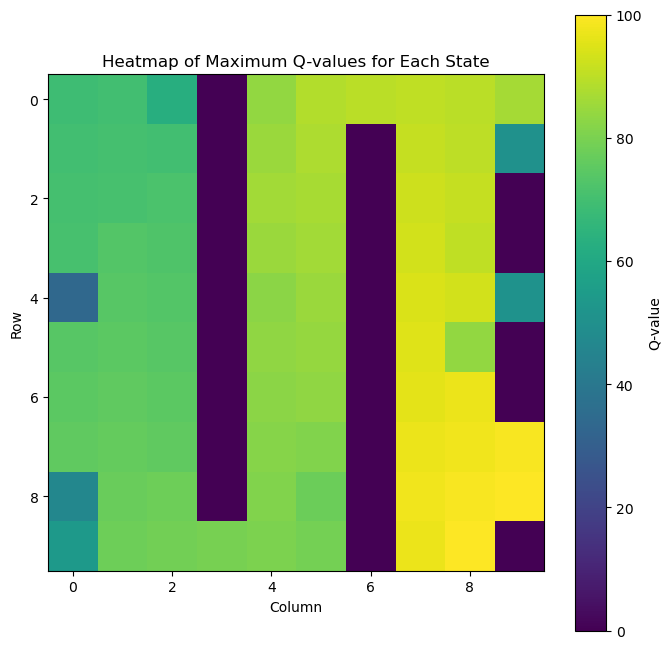

[[ 68.94490859  69.6413218   62.73986681   0.          83.72073832
   88.63848717  89.53382543  90.4382075   89.53381047  86.70515039]
 [ 69.64003997  70.3447695   69.64132079   0.          85.14393462
   87.7521023    0.          91.35172475  90.21844266  50.62717196]
 [ 70.34015252  71.05532273  71.77305326   0.          86.00583545
   86.87458128   0.          92.27446944  91.35155925   0.        ]
 [ 70.88559901  73.23033697  72.4980336    0.          85.1401907
   86.00583546   0.          93.20653479  90.42079925   0.        ]
 [ 33.8076513   73.97003734  73.21324115   0.          82.61360682
   85.14577711   0.          94.14801494  93.20219266  50.83327471]
 [ 73.96452926  74.71720943  73.95747503   0.          83.45137615
   84.29431934   0.          95.09900499  83.84828886   0.        ]
 [ 74.65758787  75.47192872  74.70735006   0.          82.61686238
   83.45005536   0.          96.059601    96.95909005   0.        ]
 [ 75.45111601  76.23427143  75.47068635   0.          8

In [71]:
agente.reset_q()

agente.env.add_walls()

rewards, steps_list, lista_q = simulate_increasing_greed(agente, start_iteration=0.3, start_greed=0.91)

my_heat_matrix = heat_matrix(agente.q)

plot_heatmap(my_heat_matrix)
print(my_heat_matrix)

agente.reset_q()